In [1]:
# Homework_3 / Oct. 2020  / Kangyan Xu

%pylab inline

import numpy as np
import time
from scipy.linalg import orth
from scipy.sparse.linalg import svds
from numpy.linalg import norm

m = 1000
n = 100000

Populating the interactive namespace from numpy and matplotlib


In [2]:
# calculate A

def mat_A(r):
    
    np.random.seed(1) # set fixed random seed
    
    # create orthonormal matrices X_m*m & Y_n*m
    X = orth(np.random.random(size=(m,m)))
    Y = orth(np.random.random(size=(n,m))) 

    # create matrix D_m*m
    temp = np.zeros(m)
    for i in range(0,r):
        temp[i] = r-(i+1)+1
    for i in range(r,m):
        temp[i] = 0.004
    D = np.diag(temp)
    
    # A = XDY_trans_m*n
    A = np.matmul(np.matmul(X,D),Y.T)
    return A


In [3]:
# run time using SVD on A

def normal_svd(A,r):
    
    start_time = time.time()
    # singular vectors corresponding to the top r singular values
    Ur,_,Vr_t = svds(A, k=r)

    SVD_time = time.time()-start_time

    print("The SVD run time is %.16f" %SVD_time)
    
    return Ur,Vr_t.T


In [4]:
# for the matrix A draw c columns

def Ur_hat(A,c,r):
    # probability for picking columns pi
    pi = norm(A,2,axis=0)**2 / norm(A,'fro')**2
    
    cols = np.random.choice(n,c,p=pi)
    B_col = A[:,cols] / np.sqrt(c*pi[cols]).reshape((1,c))
    
    Ur_hat,_,_ = svds(B_col, k=r)
    
    return Ur_hat

def Vr_hat(A,c,r):
    # probability for picking rows pj
    pj = norm(A,2,axis=1)**2 / norm(A,'fro')**2
    
    rows = np.random.choice(m,c,p=pj)
    B_row = A[rows,:] / np.sqrt(c*pj[rows]).reshape((c,1))
    
    _,_,Vr_hat_t = svds(B_row, k=r)
    
    return Vr_hat_t.T


In [5]:
# Compute errors using power method

def error_power_method(U,U_hat,size):
    # error = ||Ur^Ur^T-UrUrT||
    iteration = 15
    vec = np.random.rand(size) # random vector
    
    for i in range(iteration):
        # efficiently calculate MAT*vec
        vec_1 = np.dot(U_hat,np.dot(U_hat.T,vec))-np.dot(U,np.dot(U.T,vec))
        vec_2 = np.dot(U_hat,np.dot(U_hat.T,vec_1))-np.dot(U,np.dot(U.T,vec_1))
        
        vec_2_norm = np.linalg.norm(vec_2)
        vec = vec_2 / vec_2_norm
    
    vec_1 = np.dot(U_hat,np.dot(U_hat.T,vec))-np.dot(U,np.dot(U.T,vec))
    vec_2 = np.dot(U_hat,np.dot(U_hat.T,vec_1))-np.dot(U,np.dot(U.T,vec_1))
    error = np.dot(vec.T,vec_2)/(np.dot(vec.T,vec))
    error = np.sqrt(error)
    
    return error


In [6]:
# Problem 1 - Average run time

def report(r, err):
    
    c_sum = 0
    error_col_sum = 0
    error_row_sum = 0
    
    A = mat_A(r)
    Ur,Vr = normal_svd(A,r)

    start_time = time.time()

    for i in range(10):
    
        for c in range(r+1,350):
            Urhat = Ur_hat(A,c,r)
            Vrhat = Vr_hat(A,c,r)
            error_col = error_power_method(Ur,Urhat,m)
            error_row = error_power_method(Vr,Vrhat,n)
        
            if (error_col <= err) and (error_row <= err):
                break
        
        c_sum += c
        error_col_sum += error_col
        error_row_sum += error_row

    run_time = time.time()-start_time
        
    print('r= {}, err= {}, c= {}, error_col= {}, error_row= {}, run_time= {}'.format(r, err, c_sum/10, error_col_sum/10, error_row_sum/10, run_time/10))       


In [7]:
# Problem 1 - Average run time

report(10,0.01)
report(10,0.05)
report(10,0.1)

The SVD run time is 2.2242400646209717
r= 10, err= 0.01, c= 183.6, error_col= 0.009558938912926827, error_row= 0.009489391882537595, run_time= 238.22850205898285
The SVD run time is 2.2752034664154053
r= 10, err= 0.05, c= 18.1, error_col= 0.038262605342132425, error_row= 0.042179575003914796, run_time= 8.122266960144042
The SVD run time is 2.2338473796844482
r= 10, err= 0.1, c= 12.3, error_col= 0.08353758683451033, error_row= 0.06897917476516016, run_time= 2.1976898431777956


In [8]:
report(2,0.05)
report(5,0.05)
report(15,0.05)
report(20,0.05)

The SVD run time is 2.1245272159576416
r= 2, err= 0.05, c= 7.7, error_col= 0.03831811238166542, error_row= 0.0398126293496358, run_time= 5.290650820732116
The SVD run time is 2.1845254898071289
r= 5, err= 0.05, c= 13.0, error_col= 0.04388581597303616, error_row= 0.041495079692628806, run_time= 7.790314197540283
The SVD run time is 3.6482925415039062
r= 15, err= 0.05, c= 23.4, error_col= 0.040586322420607696, error_row= 0.04241996826399202, run_time= 9.251989006996155
The SVD run time is 4.4005935192108154
r= 20, err= 0.05, c= 27.4, error_col= 0.0457498022511705, error_row= 0.043168630999497276, run_time= 8.316781711578368


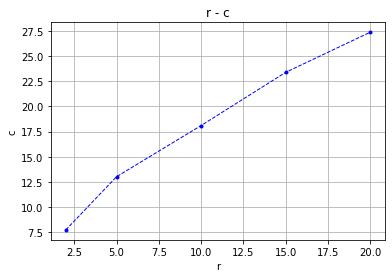

In [9]:
# fig

%matplotlib inline 
import matplotlib.pyplot as plt

r = [2, 5, 10, 15, 20]
c = [7.7, 13.0, 18.1, 23.4, 27.4]

plt.plot(r, c, color = "b", linestyle = "--", marker = ".", linewidth = 1.0)

plt.title('r - c')
plt.xlabel('r')
plt.ylabel('c')
plt.grid(True)
plt.savefig('r - c.png')

plt.show()